# Machine Learning for Ridership Prediction
### Using ARIMA Model to predict the amount of ridership for any particular bus route or a train station


In [28]:
# Imports
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error
from loss import ape

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
def parser(x):
    return datetime.strptime(x, '%m/%d/%Y')

## Bus route ridership prediction

In [31]:
# Importing dataset
folder_location = 'data'
file_name = 'CTA_-_Ridership_-_Bus_Routes_-_Monthly_Day-Type_Averages___Totals.csv'
bus = pd.read_csv(open(folder_location + '\\' + file_name), parse_dates=['Month_Beginning'], date_parser=parser)

**Bus Dataset**

In [32]:
bus

,route,routename,Month_Beginning,Avg_Weekday_Rides,Avg_Saturday_Rides,Avg_Sunday-Holiday_Rides,MonthTotal
0,1,Indiana/Hyde Park,2001-01-01,6982.6,0.0,0.0,153617
1,2,Hyde Park Express,2001-01-01,1000.0,0.0,0.0,22001
2,3,King Drive,2001-01-01,21406.5,13210.7,8725.3,567413
3,4,Cottage Grove,2001-01-01,22432.2,17994.0,10662.2,618796
4,6,Jackson Park Express,2001-01-01,18443.0,13088.2,7165.6,493926
...,...,...,...,...,...,...,...
31435,172,U. of Chicago/Kenwood,2019-12-01,1435.9,396.8,281.8,33432
31436,192,U. of Chicago Hospitals Express,2019-12-01,606.3,0.0,0.0,12732
31437,201,Central/Ridge,2019-12-01,1902.8,936.4,0.0,43705
31438,206,Evanston Circulator,2019-12-01,507.5,0.0,0.0,10657


### We clean the dataset and extract only the important features for our time series analysis

In [33]:
df = bus.loc[bus['route'] == '8']
df

,route,routename,Month_Beginning,Avg_Weekday_Rides,Avg_Saturday_Rides,Avg_Sunday-Holiday_Rides,MonthTotal
6,8,Halsted,2001-01-01,19582.2,12420.0,8280.8,521892
136,8,Halsted,2001-02-01,20741.7,12528.9,9279.6,502067
267,8,Halsted,2001-03-01,20442.8,13256.7,9257.3,553054
399,8,Halsted,2001-04-01,19911.5,13060.0,9281.7,516791
532,8,Halsted,2001-05-01,20071.9,12958.0,9308.0,539954
...,...,...,...,...,...,...,...
30813,8,Halsted,2019-08-01,18944.0,11363.3,8377.9,507096
30941,8,Halsted,2019-09-01,23848.6,12569.7,8983.5,581152
31069,8,Halsted,2019-10-01,23339.5,12329.4,8873.8,621620
31195,8,Halsted,2019-11-01,22604.8,12162.5,8348.4,554652


In [34]:
df = df.loc[:, ['Month_Beginning', 'MonthTotal']]
df.set_index('Month_Beginning', inplace=True)
df

,MonthTotal
Month_Beginning,
2001-01-01,521892
2001-02-01,502067
2001-03-01,553054
2001-04-01,516791
2001-05-01,539954
...,...
2019-08-01,507096
2019-09-01,581152
2019-10-01,621620


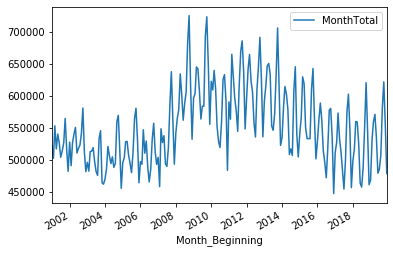

In [35]:
df.iloc[:].plot()
pyplot.show()

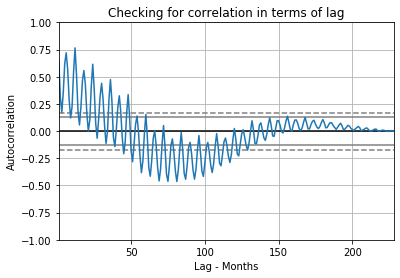

In [36]:
autocorrelation_plot(df)
pyplot.title('Checking for correlation in terms of lag')
pyplot.xlabel('Lag - Months')
pyplot.show()

As observed, the recent data highly corelates with the past 6-12 months. Using this information, we set a lag of 5 to begin, and optimize from there.

### Fitting the training data to ARIMA and optimizing the hyperparameters

                             ARIMA Model Results                              
Dep. Variable:           D.MonthTotal   No. Observations:                  227
Model:                 ARIMA(8, 1, 0)   Log Likelihood               -2683.923
Method:                       css-mle   S.D. of innovations          32780.130
Date:                Thu, 09 Apr 2020   AIC                           5387.847
Time:                        22:01:25   BIC                           5422.096
Sample:                             1   HQIC                          5401.667
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 83.4525    724.265      0.115      0.908   -1336.081    1502.986
ar.L1.D.MonthTotal    -0.5895      0.065     -9.131      0.000      -0.716      -0.463
ar.L2.D.MonthTotal  

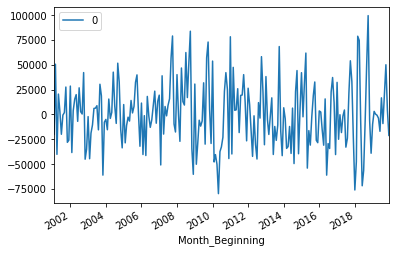

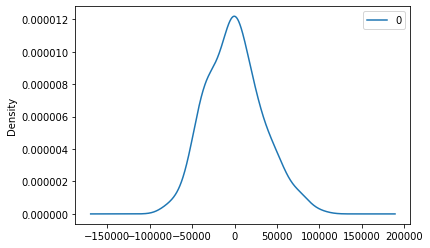

                  0
count    227.000000
mean     -39.641983
std    33030.855543
min   -79843.704278
25%   -25546.443436
50%    -1304.214416
75%    19693.739173
max    99464.715953


In [37]:
# fit model
model = ARIMA(df, order=(8,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

We can notice the gausian bias that exists in the data. We can use this information to optimize our hyperparameters further to achieve a much prediction.

## Rolling Predictions
### We use the information gained from the above experiment to train and test the model. We start by training the model on the data of 2001 to 2018. Using this trained model, we predict the average ridership for the month of January, 2019. We then add this predicted value to the data and re-train the model, to predict the value for the month of February, and so on till the month of December.

In [38]:
# Rolling Predictions
X = df.values
size = len(X) - 12 # 1 year
train, test = X[0:size], X[size:len(X)]
test = [x[0] for x in test]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(8,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat[0])
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = ape(test, predictions)
print('Test Absolute Percentage Error: ' + str(round(error, 5)))

predicted=479867.777555, expected=467743.000000
predicted=527759.762329, expected=531481.000000
predicted=557420.129610, expected=558744.000000
predicted=570731.023749, expected=570932.000000
predicted=538712.445641, expected=535001.000000
predicted=496342.324956, expected=478794.000000
predicted=468478.411327, expected=484726.000000
predicted=516488.035358, expected=507096.000000
predicted=560100.857549, expected=581152.000000
predicted=570557.454090, expected=621620.000000
predicted=550702.931338, expected=554652.000000
predicted=499999.997855, expected=478084.000000
Test Absolute Percentage Error: 0.02522


**We are able to acheive an accuracy of ~ 97.5%**

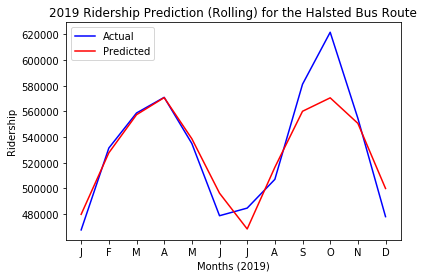

In [39]:
# plot
pyplot.title('2019 Ridership Prediction (Rolling) for the Halsted Bus Route')
pyplot.plot(test, color='blue', label='Actual')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.legend(loc="upper left")
pyplot.xticks(np.arange(12), ('J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'))
pyplot.xlabel('Months (2019)')
pyplot.ylabel('Ridership')
pyplot.show()

**It should be noted that, as we continue to predict values for much further in the future, the predictions become less accurate. Obviously, it is easier to predict the average ridership for the upcoming month, compared to 6 months from now. Regardless, the model performs quite well.**

## Train Station ridership prediction

In [40]:
# Importing dataset
folder_location = 'data'
file_name = 'CTA_-_Ridership_-__L__Station_Entries_-_Monthly_Day-Type_Averages___Totals.csv'
trains = pd.read_csv(open(folder_location + '\\' + file_name), parse_dates=['month_beginning'], date_parser=parser)

**Train Dataset**

In [41]:
trains

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
0,40900,Howard,2001-01-01,6233.9,3814.5,2408.6,164447
1,41190,Jarvis,2001-01-01,1489.1,1054.0,718.0,40567
2,40100,Morse,2001-01-01,4412.5,3064.5,2087.8,119772
3,41300,Loyola,2001-01-01,4664.5,3156.0,1952.8,125008
4,40760,Granville,2001-01-01,3109.8,2126.0,1453.8,84189
...,...,...,...,...,...,...,...
32468,40850,Library,2019-12-01,2894.6,1253.5,792.7,70556
32469,40680,Adams/Wabash,2019-12-01,5498.6,2258.8,1460.5,133268
32470,41700,Washington/Wabash,2019-12-01,9848.1,5374.5,3535.5,249522
32471,40260,State/Lake,2019-12-01,10751.6,5683.5,3810.5,271380


In [42]:
np.array(sorted(trains.stationame.unique().tolist()))

array(['18th', '35-Bronzeville-IIT', '35th/Archer', '43rd',
       '47th-Dan Ryan', '47th-South Elevated', '51st', '54th/Cermak',
       '63rd-Dan Ryan', '69th', '79th', '87th', '95th/Dan Ryan',
       'Adams/Wabash', 'Addison-Brown', 'Addison-North Main',
       "Addison-O'Hare", 'Argyle', 'Armitage', 'Ashland-Lake',
       'Ashland-Orange', 'Ashland/63rd', 'Austin-Forest Park',
       'Austin-Lake', 'Belmont-North Main', "Belmont-O'Hare", 'Berwyn',
       'Bryn Mawr', 'California-Cermak', 'California-Lake',
       'California/Milwaukee', 'Central Park', 'Central-Evanston',
       'Central-Lake', 'Cermak-Chinatown', 'Cermak-McCormick Place',
       'Chicago/Franklin', 'Chicago/Milwaukee', 'Chicago/State',
       'Cicero-Cermak', 'Cicero-Forest Park', 'Cicero-Lake',
       'Clark/Division', 'Clark/Lake', 'Clinton-Forest Park',
       'Clinton-Lake', 'Conservatory', 'Cumberland', 'Damen-Brown',
       'Damen-Cermak', 'Damen/Milwaukee', 'Davis', 'Dempster',
       'Dempster-Skokie', 'Div

### We clean the dataset and extract only the important features for our time series analysis

In [43]:
df = trains.loc[trains['stationame'] == 'Halsted-Orange']
df

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
131,41130,Halsted-Orange,2001-01-01,2385.1,679.3,357.4,56976
273,41130,Halsted-Orange,2001-02-01,2500.2,694.8,443.3,54555
414,41130,Halsted-Orange,2001-03-01,2509.9,771.6,403.3,60689
556,41130,Halsted-Orange,2001-04-01,2449.3,760.8,399.8,56477
698,41130,Halsted-Orange,2001-05-01,2538.2,762.0,436.2,61069
...,...,...,...,...,...,...,...
31892,41130,Halsted-Orange,2019-08-01,2433.5,1175.8,896.0,62999
32035,41130,Halsted-Orange,2019-09-01,3160.2,1183.0,846.3,73013
32178,41130,Halsted-Orange,2019-10-01,3059.5,1198.0,1197.0,79949
32321,41130,Halsted-Orange,2019-11-01,2825.7,1118.0,773.0,65968


In [44]:
df = df.loc[:, ['month_beginning', 'monthtotal']]
df.set_index('month_beginning', inplace=True)
df

,monthtotal
month_beginning,
2001-01-01,56976
2001-02-01,54555
2001-03-01,60689
2001-04-01,56477
2001-05-01,61069
...,...
2019-08-01,62999
2019-09-01,73013
2019-10-01,79949


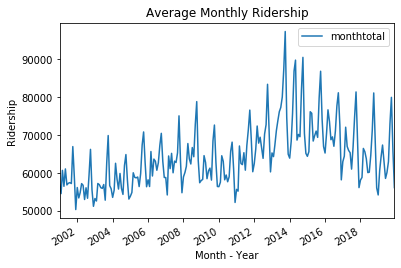

In [45]:
df.iloc[:].plot()
pyplot.title('Average Monthly Ridership')
pyplot.xlabel('Month - Year')
pyplot.ylabel('Ridership')
pyplot.show()

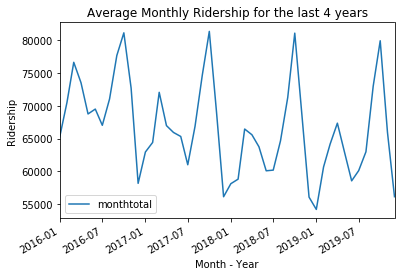

In [46]:
df.iloc[-48:].plot()
pyplot.title('Average Monthly Ridership for the last 4 years')
pyplot.xlabel('Month - Year')
pyplot.ylabel('Ridership')
pyplot.show()

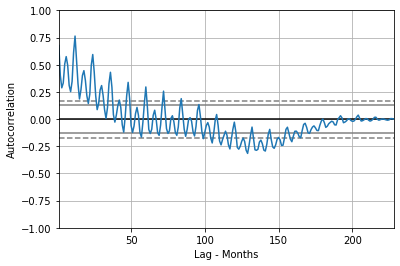

In [47]:
autocorrelation_plot(df)
pyplot.xlabel('Lag - Months')
pyplot.show()

As observed, the recent data highly corelates with the past 6-12 months. Using this information, we set a lag of 5 to begin, and optimize from there.

### Fitting the training data to ARIMA and optimizing the hyperparameters

                             ARIMA Model Results                              
Dep. Variable:           D.monthtotal   No. Observations:                  227
Model:                 ARIMA(8, 1, 1)   Log Likelihood               -2257.695
Method:                       css-mle   S.D. of innovations           5019.975
Date:                Thu, 09 Apr 2020   AIC                           4537.389
Time:                        22:01:37   BIC                           4575.064
Sample:                             1   HQIC                          4552.592
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 29.6690     54.530      0.544      0.587     -77.208     136.546
ar.L1.D.monthtotal     0.3005      0.080      3.747      0.000       0.143       0.458
ar.L2.D.monthtotal  

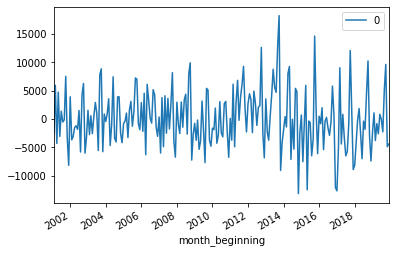

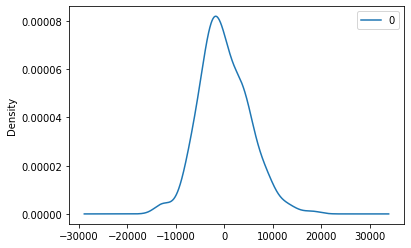

                  0
count    227.000000
mean       3.087952
std     5047.471610
min   -13177.676889
25%    -3282.954340
50%     -543.433746
75%     3318.595658
max    18205.679609


In [48]:
# fit model
model = ARIMA(df, order=(8,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

We can notice the gausian bias that exists in the data. We can use this information to optimize our hyperparameters further to achieve a much prediction.

## Rolling Predictions
### We use the information gained from the above experiment to train and test the model. We start by training the model on the data of 2001 to 2018. Using this trained model, we predict the average ridership for the month of January, 2019. We then add this predicted value to the data and re-train the model, to predict the value for the month of February, and so on till the month of December.

In [49]:
# Rolling Predictions
X = df.values
size = len(X) - 12 # 1 year
train, test = X[0:size], X[size:len(X)]
test = [x[0] for x in test]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(8,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat[0])
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = ape(test, predictions)
print('Test Absolute Percentage Error: ' + str(round(error, 5)))

predicted=56897.179699, expected=54202.000000
predicted=59576.802826, expected=60682.000000
predicted=67944.295478, expected=64173.000000
predicted=68109.825494, expected=67369.000000
predicted=65727.990584, expected=63011.000000
predicted=57906.554974, expected=58566.000000
predicted=60220.321100, expected=60123.000000
predicted=65150.214435, expected=62999.000000
predicted=67662.835432, expected=73013.000000
predicted=70220.663233, expected=79949.000000
predicted=71126.477266, expected=65968.000000
predicted=60762.145406, expected=56141.000000
Test Absolute Percentage Error: 0.04861


**We are able to acheive an accuracy of ~ 95.2%**

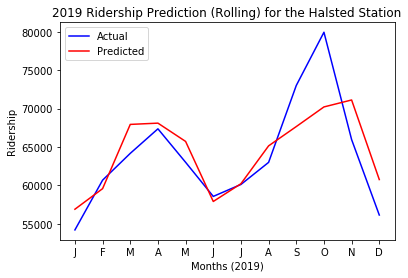

In [50]:
# plot
pyplot.title('2019 Ridership Prediction (Rolling) for the Halsted Station')
pyplot.plot(test, color='blue', label='Actual')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.legend(loc="upper left")
pyplot.xticks(np.arange(12), ('J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'))
pyplot.xlabel('Months (2019)')
pyplot.ylabel('Ridership')
pyplot.show()

**It should be noted that, as we continue to predict values for much further in the future, the predictions become less accurate. Obviously, it is easier to predict the average ridership for the upcoming month, compared to 6 months from now. Regardless, the model performs quite well.**